In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
#DATA PREPROCESSING STEPS
df=pd.read_csv("dataset.csv")

In [3]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [4]:
df['Salary'].mean()

63777.77777777778

FINDING X AND Y VALUES BY DATA PREPROCESSING STEPS

In [5]:
x=df.iloc[:,:-1].values
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [6]:
y=df.iloc[:,-1].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

AS THERE ARE FEW NAN'S IN THE DATA WE WILL IMPUTE MISSING VALUES BY MEAN OR MEDIAN

In [7]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
x[:,1:]=imputer.fit_transform(x[:,1:])
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

ASSIGNMENT- IMPUTING BY MEDIAN

In [8]:
from sklearn.impute import SimpleImputer
i=SimpleImputer(missing_values=np.nan,strategy='median')
x[:,1:]=i.fit_transform(x[:,1:])
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

AS WE HAVE A CATEGORICAL COLUMN, WE NEED TO ENCODE THE DATASET 

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
c=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder="passthrough")
x=np.array(c.fit_transform(x))  
print(x)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [10]:
#As y contains categorical data yes and no, we need to encode that also.But as there is only 1 column for y,we use LABEL ENCODER

In [11]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
y=l.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

splitting dataset into train and test set

In [17]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=0)


In [18]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(x_tr,y_tr)
y_pred=l.predict(x_te)

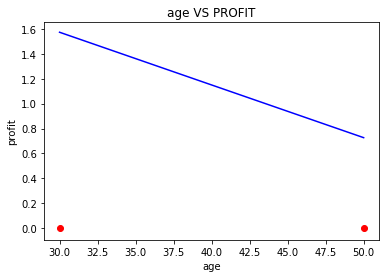

In [23]:
#plotting
plt.scatter(x_te[:,3],y_te,c="red")
plt.plot(x_te[:,3],y_pred,c="blue")
plt.title("age VS PROFIT")
plt.xlabel("age")
plt.ylabel("profit")
plt.show()

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
rscore=r2_score(y_te,y_pred)
rscore

0.0

In [27]:
mse=mean_squared_error(y_te,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_te,y_pred)
print(mse, rmse, mae)

1.5017297777784655 1.2254508467410945 1.1500590643616944
